### Part 1: Using the TextBlob Sentiment Analyzer

In [105]:
# Import libraries
import nltk
import pandas as pd
import numpy as np
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

In [148]:
# loading tsv dataset into Pandas Dataframe
df = pd.read_table('labeledTrainData.tsv')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [149]:
# checking num of rows & columns 
df.shape

(25000, 3)

In [150]:
#Dropping any duplicate reviews
df.drop_duplicates(subset ="review", keep = "first", inplace = True)

In [151]:
# checking the rows after duplicate drop
df.shape

(24904, 3)

In [152]:
# Converting to a string
df['review'] = df['review'].astype('str')

In [153]:
# Generating sentiment polarity using TextBlob
def get_polarity(text):
 return TextBlob(text).sentiment.polarity
df['Polarity'] = df['review'].apply(get_polarity)

In [154]:
# Segregating Sentiment to Positive vs Negative based on Polarity
df['Sentiment_Type']=''
df.loc[df.Polarity>=0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [155]:
# Segregating Sentiment to Positive vs Negative based on Polarity
df['Sentiment_Type_Num']=''
df.loc[df.Polarity>=0,'Sentiment_Type_Num']=1
df.loc[df.Polarity<0,'Sentiment_Type_Num']=0

In [156]:
# Checking Sample data
df.head()

,id,sentiment,review,Polarity,Sentiment_Type,Sentiment_Type_Num
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,POSITIVE,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,POSITIVE,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,NEGATIVE,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,POSITIVE,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,NEGATIVE,0


In [157]:
# Checking count of Positive vs Negative Reviews
df.Sentiment_Type.value_counts()

POSITIVE    18946
NEGATIVE     5958
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}>

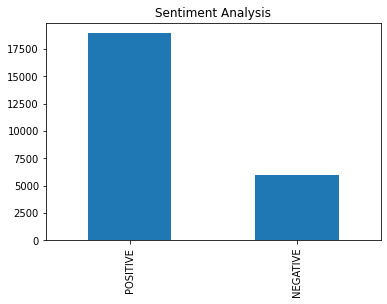

In [158]:
# Plotting the Positive Vs Negative reviews to clearly visualize the result
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [159]:
import sklearn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

print("TextBlob accuracy score is: ", accuracy_score(df['sentiment'],df['Sentiment_Type_Num'].astype(str).astype(int)))

TextBlob accuracy score is:  0.6858336010279473


#### Sentiment Analysis using VADER

In [160]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()

In [161]:
# # Generating sentiment polarity
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,id,sentiment,review,Polarity,Sentiment_Type,Sentiment_Type_Num,scores
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,POSITIVE,1,"{'neg': 0.13, 'neu': 0.744, 'pos': 0.126, 'com..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,POSITIVE,1,"{'neg': 0.047, 'neu': 0.739, 'pos': 0.214, 'co..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,NEGATIVE,0,"{'neg': 0.142, 'neu': 0.8, 'pos': 0.058, 'comp..."
3,3630_4,0,It must be assumed that those who praised this...,0.134753,POSITIVE,1,"{'neg': 0.066, 'neu': 0.878, 'pos': 0.056, 'co..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,NEGATIVE,0,"{'neg': 0.119, 'neu': 0.741, 'pos': 0.14, 'com..."


In [162]:
# Segregating Sentiment to Positive vs Negative based on Polarity

df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>=0,'sentiment_type']='POSITIVE'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [163]:
df['sentiment_type_num']=''
df.loc[df.compound>=0,'sentiment_type_num']=1
df.loc[df.compound<0,'sentiment_type_num']=0

In [164]:
# Checking Sample data
df.head()

,id,sentiment,review,Polarity,Sentiment_Type,Sentiment_Type_Num,scores,compound,sentiment_type,sentiment_type_num
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,POSITIVE,1,"{'neg': 0.13, 'neu': 0.744, 'pos': 0.126, 'com...",-0.8278,NEGATIVE,0
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,POSITIVE,1,"{'neg': 0.047, 'neu': 0.739, 'pos': 0.214, 'co...",0.9819,POSITIVE,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,NEGATIVE,0,"{'neg': 0.142, 'neu': 0.8, 'pos': 0.058, 'comp...",-0.9883,NEGATIVE,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,POSITIVE,1,"{'neg': 0.066, 'neu': 0.878, 'pos': 0.056, 'co...",-0.2189,NEGATIVE,0
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,NEGATIVE,0,"{'neg': 0.119, 'neu': 0.741, 'pos': 0.14, 'com...",0.7960,POSITIVE,1


In [165]:
# Checking count of Positive vs Negative Reviews
df.sentiment_type.value_counts()

POSITIVE    16417
NEGATIVE     8487
Name: sentiment_type, dtype: int64

<AxesSubplot:title={'center':'Sentiment analysis Via VADER'}>

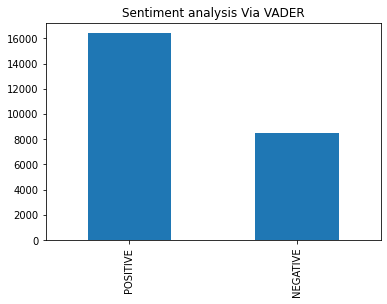

In [166]:
# Plotting the Positive Vs Negative reviews to clearly visualize the result
df.sentiment_type.value_counts().plot(kind='bar',title="Sentiment analysis Via VADER")

In [167]:
import sklearn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

print("Vader accuracy score is: ", accuracy_score(df['sentiment'],df['sentiment_type_num'].astype(str).astype(int)))


Vader accuracy score is:  0.6937439768711854


### Part 2: Prepping Text for a Custom Model

In [75]:
# loading tsv dataset into Pandas Dataframe
df2 = pd.read_table('labeledTrainData.tsv')
df2.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [79]:

df2['review'] = df2['review'].astype(str)

#Convert all text to lowercase letters.
df2['review'] = df2['review'].str.lower()
df2.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,the film starts with a manager (nicholas bell)...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [80]:
#Remove punctuation and special characters from the text.

# Load libraries
import unicodedata
import sys

# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))

# For each string, remove any punctuation characters
df2['review'] = [string.translate(punctuation) for string in df2.review]

In [83]:
# Load library
from nltk.tokenize import word_tokenize


# Tokenize words
review_token = word_tokenize(str(df2.review))

In [85]:
# Remove stop words.

# !python -m nltk.downloader stopwords

# Load library
from nltk.corpus import stopwords

# Load stop words
stop_words = stopwords.words('english')

# Remove stop words
# df2['review'] = [word for word in df2.review if word not in stop_words]
review_stp_word = [word for word in review_token if word not in stop_words]

In [88]:
#Apply NLTK’s PorterStemmer.

# Load library
from nltk.stem.porter import PorterStemmer

# Create stemmer
porter = PorterStemmer()

# Apply stemmer
#df2['review'] = [porter.stem(word) for word in df2.review]
review_stem = [porter.stem(word) for word in review_stp_word]

Create a bag-of-words matrix from your stemmed text where each row is a word-count vector for a single movie review. 
Display the dimensions of your bag-of-words matrix. 

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag of words feature matrix
count = CountVectorizer()
#bag_of_words = count.fit_transform(df2.review)
bag_of_words = count.fit_transform(review_stem)

# Show feature matrix
bag_of_words

<81x54 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [91]:
bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
# Show feature names
count.get_feature_names_out()

array(['24995', '24996', '24997', '24998', '24999', '25000', '30',
       'assum', 'believ', 'bell', 'broke', 'build', 'buñuel', 'cant',
       'child', 'classic', 'complet', 'consider', 'documentari', 'dont',
       'dtype', 'film', 'get', 'girl', 'go', 'gone', 'guy', 'hine',
       'length', 'like', 'loser', 'made', 'manag', 'minut', 'moment',
       'movi', 'must', 'name', 'need', 'nichola', 'object', 'prais',
       'review', 'saw', 'seem', 'start', 'stuff', 'superbl', 'timothi',
       'trashi', 'unpretenti', 'war', 'wondrous', 'world'], dtype=object)

In [97]:
# Create feature matrix with arguments
count_2gram = CountVectorizer(ngram_range=(1,2),
                              stop_words="english")
#bag = count_2gram.fit_transform(df2.review)
bag = count_2gram.fit_transform(review_stem)

# View feature matrix
bag.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
# View the 1-grams and 2-grams
count_2gram.vocabulary_

{'stuff': 39,
 'moment': 30,
 'classic': 14,
 'war': 44,
 'world': 46,
 'timothi': 41,
 'hine': 24,
 'film': 20,
 'start': 38,
 'manag': 28,
 'nichola': 33,
 'bell': 9,
 'assum': 7,
 'prais': 35,
 'superbl': 40,
 'trashi': 42,
 'wondrous': 45,
 'unpretenti': 43,
 '24995': 0,
 'like': 26,
 'consider': 16,
 'gone': 22,
 '24996': 1,
 'dont': 18,
 'believ': 8,
 'complet': 15,
 '24997': 2,
 'guy': 23,
 'loser': 27,
 'girl': 21,
 'need': 32,
 'build': 11,
 '24998': 3,
 '30': 6,
 'minut': 29,
 'documentari': 17,
 'buñuel': 12,
 '24999': 4,
 'saw': 37,
 'movi': 31,
 'child': 13,
 'broke': 10,
 'review': 36,
 'length': 25,
 '25000': 5,
 'dtype': 19,
 'object': 34}

Create a term frequency-inverse document frequency (tf-idf) matrix from your stemmed text, for your movie reviews. Display the dimensions of your tf-idf matrix.

In [99]:
# Load libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(review_stem)

# Show tf-idf feature matrix
feature_matrix

<81x54 sparse matrix of type '<class 'numpy.float64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [100]:
# Show tf-idf feature matrix as dense matrix
feature_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
# Show feature names
tfidf.vocabulary_

{'stuff': 46,
 'go': 24,
 'moment': 34,
 'classic': 15,
 'war': 51,
 'world': 53,
 'timothi': 48,
 'hine': 27,
 'film': 21,
 'start': 45,
 'manag': 32,
 'nichola': 39,
 'bell': 9,
 'must': 36,
 'assum': 7,
 'prais': 41,
 'superbl': 47,
 'trashi': 49,
 'wondrous': 52,
 'unpretenti': 50,
 '24995': 0,
 'seem': 44,
 'like': 29,
 'consider': 17,
 'gone': 25,
 '24996': 1,
 'dont': 19,
 'believ': 8,
 'made': 31,
 'complet': 16,
 '24997': 2,
 'guy': 26,
 'loser': 30,
 'cant': 13,
 'get': 22,
 'girl': 23,
 'need': 38,
 'build': 11,
 '24998': 3,
 '30': 6,
 'minut': 33,
 'documentari': 18,
 'buñuel': 12,
 '24999': 4,
 'saw': 43,
 'movi': 35,
 'child': 14,
 'broke': 10,
 'name': 37,
 'review': 42,
 'length': 28,
 '25000': 5,
 'dtype': 20,
 'object': 40}